In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error

In [ ]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.4 MB/s eta 0:00:00


[*********************100%***********************]  1 of 1 completed


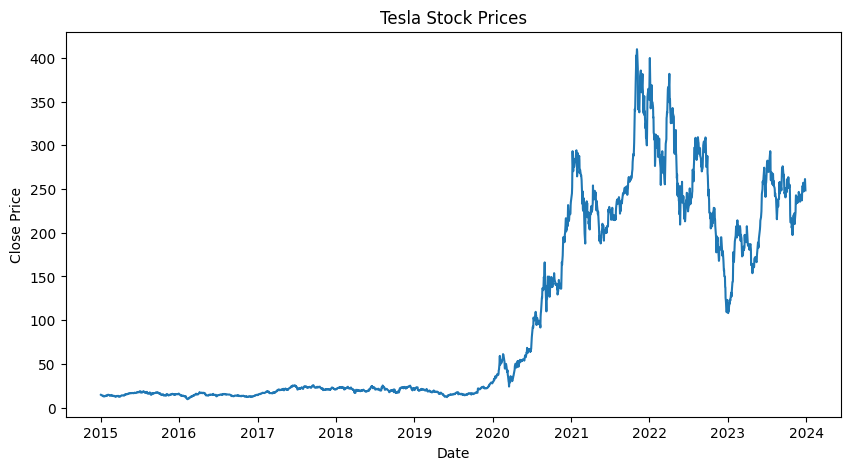

In [ ]:
tesla = yf.download("TSLA", start="2015-01-01", end="2023-12-31")
data = tesla['Close']

plt.figure(figsize=(10, 5))
plt.plot(data)
plt.title("Tesla Stock Prices")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

In [ ]:
def test_stationarity(timeseries):
    result = adfuller(timeseries)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print("Stationary" if result[1] <= 0.05 else "Non-Stationary")

test_stationarity(data)

ADF Statistic: -1.081570978318191
p-value: 0.7223649564823027
Non-Stationary


In [ ]:
data_diff = data.diff().dropna()
test_stationarity(data_diff)

ADF Statistic: -9.534725626008955
p-value: 2.828757989867384e-16
Stationary


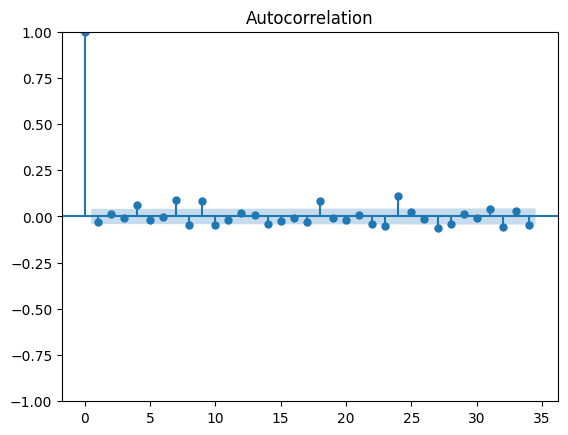

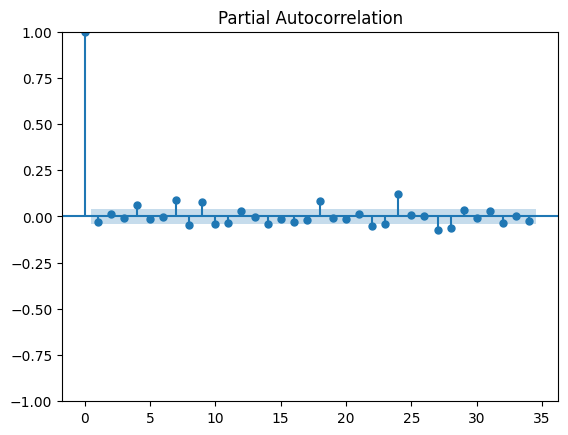

In [ ]:
plot_acf(data_diff)
plt.show()
plot_pacf(data_diff)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=14130.675, Time=3.73 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=14126.308, Time=0.14 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=14126.530, Time=0.26 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=14126.587, Time=0.63 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=14125.022, Time=0.11 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=14126.783, Time=3.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 7.941 seconds
Optimal ARIMA order: (0, 1, 0)
Auto ARIMA RMSE: 8.09079590043138


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


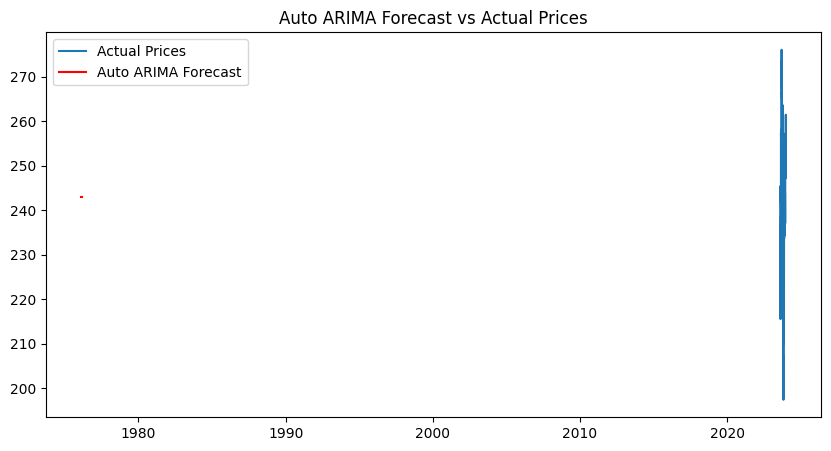

In [ ]:
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

train_data = data[:-30]
test_data = data[-30:]

auto_arima_model = auto_arima(
    train_data,
    seasonal=False,
    stepwise=True,
    suppress_warnings=True,
    trace=True
)

print(f"Optimal ARIMA order: {auto_arima_model.order}")

forecast = auto_arima_model.predict(n_periods=30)

rmse_auto_arima = np.sqrt(mean_squared_error(test_data, forecast))
print(f"Auto ARIMA RMSE: {rmse_auto_arima}")

plt.figure(figsize=(10, 5))
plt.plot(data[-100:], label="Actual Prices")
plt.plot(range(len(data)-30, len(data)), forecast, label="Auto ARIMA Forecast", color="red")
plt.legend()
plt.title("Auto ARIMA Forecast vs Actual Prices")
plt.show()

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data.values.reshape(-1, 1))

def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(sequence_length, len(data)):
        X.append(data[i-sequence_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

sequence_length = 60
X, y = create_sequences(scaled_data, sequence_length)

X = np.reshape(X, (X.shape[0], X.shape[1], 1))

split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [ ]:
from sklearn.model_selection import KFold
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense

X = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

rmse_scores = []

for train_index, val_index in kfold.split(X):
    X_train_fold, X_val_fold = X[train_index], X[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_fold.shape[1], 1)))
    model.add(LSTM(units=50))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, verbose=0)

    y_pred_fold = model.predict(X_val_fold)
    rmse = np.sqrt(mean_squared_error(y_val_fold, y_pred_fold))
    rmse_scores.append(rmse)

print(f"Cross-Validated RMSE Scores: {rmse_scores}")
print(f"Average RMSE: {np.mean(rmse_scores)}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step
Cross-Validated RMSE Scores: [0.08721145292585493, 0.07177493464912056, 0.06719177874925239, 0.065358344724679, 0.06390979604914487]
Average RMSE: 0.07108926141961035


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


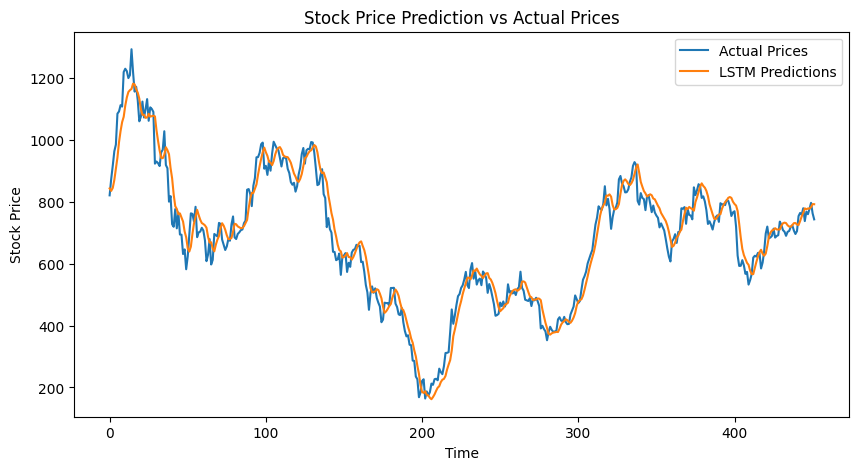

In [ ]:
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

predicted_prices = model.predict(X_test_reshaped)
predicted_prices = scaler.inverse_transform(predicted_prices.reshape(-1, 1))

actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(10, 5))
plt.plot(actual_prices, label='Actual Prices')
plt.plot(predicted_prices, label='LSTM Predictions')
plt.legend()
plt.title("Stock Price Prediction vs Actual Prices")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

def create_lagged_features(data, lag=5):
    df = pd.DataFrame(data)
    for i in range(1, lag + 1):
        df[f'lag_{i}'] = df[0].shift(i)
    df.dropna(inplace=True)
    return df

lag = 5
data_lagged = create_lagged_features(data.values, lag)

X = data_lagged.iloc[:, 1:].values
y = data_lagged.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

XGBoost RMSE: 0.10206275996833496


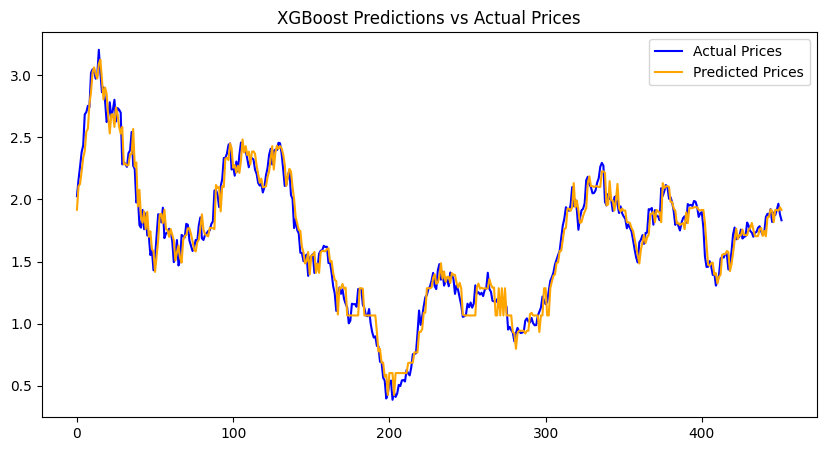

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

regressor = xgb.XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"XGBoost RMSE: {rmse_xgb}")

plt.figure(figsize=(10, 5))
plt.plot(y_test, label="Actual Prices", color="blue")
plt.plot(y_pred, label="Predicted Prices", color="orange")
plt.title("XGBoost Predictions vs Actual Prices")
plt.legend()
plt.show()